In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')
%load_ext google.colab.data_table

Authenticated


Projekt ogólnodostępny znajduje się pod nazwą: "jrjames83-1171" i w nim wszystkie tabele

In [ ]:
%%bigquery --project produkcja-instore
select t.inventory_id, i.film_id from 
(
SELECT p.payment_id, p.rental_id, r.inventory_id
FROM `jrjames83-1171.sampledata.payments` p
    join `jrjames83-1171.sampledata.rental` r on p.rental_id = r.rental_id
where p.amount > 0 and p.staff_id not in (1,3,5)
) t join `jrjames83-1171.sampledata.inventory` i on t.inventory_id = i.inventory_id
limit 5

,inventory_id,film_id
0,3669,803
1,3080,677
2,4499,982
3,3528,772
4,3981,868


In [ ]:
%%bigquery --project produkcja-instore
SELECT t.title, t.id, count(distinct t.tag) n_unique_tags
FROM
`jrjames83-1171.sampledata.top_questions` t
where tag != 'undenfind'
group by 1,2
order by 3 desc
limit 5

,title,id,n_unique_tags
0,Zebra ZPL Commands to resize barcode to sit wi...,27034626,5
1,What installation product to use? InstallShiel...,1544292,5
2,"How can I resolve the error ""certificate subje...",41377036,5
3,Correct format specifier for double in printf,4264127,5
4,How can I get the actual video URL of a YouTub...,35608686,5


In [ ]:
%%bigquery --project produkcja-instore
SELECT t.title, t.id, array_agg(distinct t.tag) tag_array
FROM
`jrjames83-1171.sampledata.top_questions` t
where tag != 'undenfind'
group by 1,2
limit 5

,title,id,tag_array
0,How to write unicode cross symbol in Java?,16616162,[unicode-literals]
1,"Windows batch file, wait for command to finish?",40193625,[wait]
2,The authentication schemes configured on the h...,25626217,[webhttpbinding]
3,How does Google Swiffy implement clickTag for ...,32746394,[unminify]
4,How to find the source of an 'Access Violation',23155063,"[windows-error-reporting, access-violation]"


In [ ]:
%%bigquery --project produkcja-instore
SELECT t.title, t.id, array_agg(distinct t.tag) tag_array
FROM
`jrjames83-1171.sampledata.top_questions` t
where tag like '%python%'
group by 1,2
having array_length(array_agg(distinct t.tag)) > 2
order by array_length(array_agg(distinct t.tag)) desc
limit 5

,title,id,tag_array
0,Is it possible to modify PYTHONPATH at runtime?,5318441,"[boost-python, python-c-api, python-embedding]"
1,"Python-C integration: Ctypes, CFFI or create a...",17755697,"[python-cffi, python-c-extension, python-sip]"
2,PyEval_InitThreads in Python 3: How/when to ca...,15470367,"[python-c-extension, python-3.2, python-c-api]"
3,Create an object using Python's C API,4163018,"[python-c-api, python-embedding, python-extens..."
4,How to show PIL Image in ipython notebook,26649716,"[ipython-notebook, ipython, python-imaging-lib..."


trim - wszystkie białe znaki przed i po zostaną usunięte

In [ ]:
%%bigquery --project produkcja-instore
select * 
from (
    SELECT t.title, t.id, array_agg(distinct t.tag) tag_array
    FROM
    `jrjames83-1171.sampledata.top_questions` t
    where trim(lower(title)) like '%python%'
    group by 1,2
    )
where array_length(tag_array) > 2 
limit 5

,title,id,tag_array
0,How to implement GLCM algorithm in python(open...,52923606,"[glcm, feature-extraction, skin]"
1,"Python-C integration: Ctypes, CFFI or create a...",17755697,"[python-cffi, python-c-extension, python-sip]"
2,What is the pythonic way to detect the last el...,1630320,"[idioms, fencepost, for-loop]"
3,How to ssh connect through python Paramiko wit...,8382847,"[public-key, paramiko, putty]"
4,Iterate over object attributes in python,11637293,"[oop, iteration, attributes]"


In [ ]:
%%bigquery --project produkcja-instore
    SELECT t.tag, array_length(array_agg(distinct t.id)) unique_questions
    FROM
    `jrjames83-1171.sampledata.top_questions` t
    group by 1
    order by 2 desc
    limit 5

,tag,unique_questions
0,wpa,30
1,zipfile,30
2,yo,30
3,war,30
4,wcf,30


In [ ]:
%%bigquery --project produkcja-instore
with prep as (
    SELECT t.tag, array_length(array_agg(distinct t.id)) unique_questions
    FROM
    `jrjames83-1171.sampledata.top_questions` t
    where trim(lower(title)) like '%python%'
    group by 1
    order by 2 desc)

    select avg(unique_questions) avg, min(unique_questions) min, max(unique_questions) max
    from prep

,avg,min,max
0,3.454097,1,30


In [ ]:
%%bigquery --project produkcja-instore
with prep as (
    SELECT t.tag, array_length(array_agg(distinct t.id)) unique_questions
    FROM
    `jrjames83-1171.sampledata.top_questions` t
    where trim(lower(title)) like '%python%'
    group by 1
    order by 2 desc)

    select * from prep
    where unique_questions < (
        select avg(unique_questions)
        from prep
    )
    limit 5

,tag,unique_questions
0,yaml,3
1,icmp,3
2,https,3
3,wifi,3
4,wpa-supplicant,3


In [ ]:
%%bigquery --project produkcja-instore
SELECT t.id, t.title, array_agg(distinct t.tag) tag_array
FROM `jrjames83-1171.sampledata.top_questions` t
group by 1,2
limit 3

,id,title,tag_array
0,458436,Adding folders to a zip file using python,[zipfile]
1,55509392,jhipster - create front end only,[yo]
2,25266663,There is insufficient system memory in resourc...,[wcf]


array_to_string - to konkatenacja elementów do postaci string

https://cloud.google.com/spanner/docs/reference/standard-sql/array_functions#array_to_string

array_agg - łączy elementy w tablicę

https://cloud.google.com/bigquery/docs/reference/standard-sql/aggregate_functions#array_agg

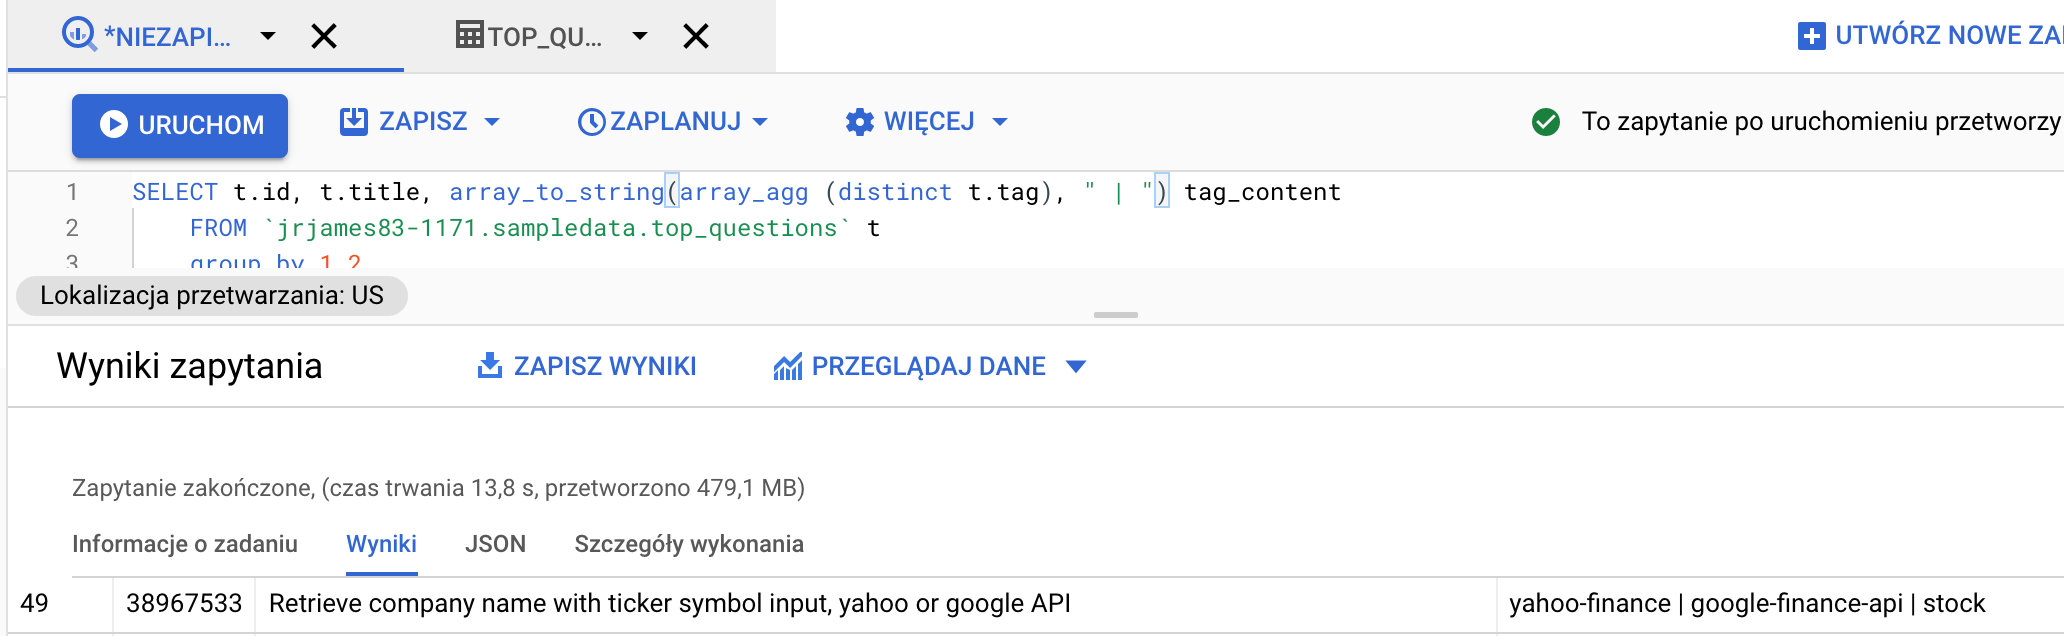

In [ ]:
%%bigquery --project produkcja-instore
with prep as (
    SELECT t.id, t.title, array_to_string(array_agg (distinct t.tag), " ") tag_content
    FROM `jrjames83-1171.sampledata.top_questions` t
    group by 1,2 
),

language_table as (
    select id,
    case 
    when title like '%python%' and tag_content like '%python%' then 'python_in_both'
    when title like '%python%' and tag_content not like '%python%' then 'python_title_only'
    when title not like '%python%' and tag_content like '%python%' then 'python_tag_only'

    when title like '%sql%' and tag_content like '%sql%' then 'sql_in_both'
    when title like '%sql%' and tag_content not like '%sql%' then 'sql_title_only'
    when title not like '%sql%' and tag_content like '%sql%' then 'sql_tag_only'

    when title like '%javascript%' and tag_content like '%javascript%' then 'javascript_in_both'
    when title like '%javascript%' and tag_content not like '%javascript%' then 'javascript_title_only'
    when title not like '%javascript%' and tag_content like '%javascript%' then 'javascript_tag_only'

    else null
    end language

from prep
order by 1)

select coalesce(language, 'not_match') language, count(*) number_of_questions
from language_table 
group by 1
order by 2 desc
limit 5

,language,number_of_questions
0,not_match,482894
1,python_title_only,6870
2,sql_tag_only,5687
3,sql_title_only,2842
4,python_tag_only,2629


In [ ]:
%%bigquery --project produkcja-instore
with prep as (SELECT 
distinct 
    case when title like '%python%' then 'python'
    when title like '%sql' then 'sql'
    when title like '%javascript' then 'javascript'
    when title like '%ruby%' then 'ruby'
    end as language, id, quarter, quarter_views

FROM `jrjames83-1171.sampledata.top_questions` 
)

select language, extract(year from quarter) year, sum(quarter_views) sum_views
from prep
where language is not null
group by 1,2
order by 1,2
limit 5

,language,year,sum_views
0,javascript,2017,2232423
1,javascript,2018,2904830
2,javascript,2019,3424638
3,javascript,2020,1891154
4,python,2017,19952439


In [ ]:
# lag step 1

%%bigquery --project produkcja-instore
with prep as (SELECT 
distinct 
    case when title like '%python%' then 'python'
    when title like '%sql' then 'sql'
    when title like '%javascript' then 'javascript'
    when title like '%ruby%' then 'ruby'
    end as language, id, quarter, quarter_views
FROM `jrjames83-1171.sampledata.top_questions` 
),

summary_table as (
select language, extract(year from quarter) year, sum(quarter_views) views
from prep
where language is not null
group by 1,2
order by 1,2
)

select st.*, lag(views) over (partition by language order by year) lag_view
from summary_table st
limit 5

,language,year,views,lag_view
0,ruby,2017,822936,NaN
1,ruby,2018,951684,822936.0
2,ruby,2019,1011004,951684.0
3,ruby,2020,511856,1011004.0
4,javascript,2017,2232423,NaN


In [ ]:
# lag step 2

%%bigquery --project produkcja-instore
with prep as (SELECT 
distinct 
    case when title like '%python%' then 'python'
    when title like '%sql' then 'sql'
    when title like '%javascript' then 'javascript'
    when title like '%ruby%' then 'ruby'
    end as language, id, quarter, quarter_views
FROM `jrjames83-1171.sampledata.top_questions` 
),

summary_table as (
select language, extract(year from quarter) year, sum(quarter_views) views
from prep
where language is not null
group by 1,2
order by 1,2
)

select st.*, round ((views / lag(views) over (partition by language order by year) - 1) * 100 ,2)  || '%' pct_change_YoY
from summary_table st
limit 5

,language,year,views,pct_change_YoY
0,javascript,2017,2232423,None
1,javascript,2018,2904830,30.12%
2,javascript,2019,3424638,17.89%
3,javascript,2020,1891154,-44.78%
4,ruby,2017,822936,None


In [ ]:
def generate_case_stmt(lang):
    return f"""
        when title like '%{lang}%' and tag_content like '%{lang}%' then '{lang}_in_both'
        when title like '%{lang}%' and tag_content not like '%{lang}%' then '{lang}_title_only'
        when title not like '%{lang}%' and tag_content like '%{lang}%' then '{lang}_tag_only'
     """

for language in ['python', 'sql', 'javascript', 'java', 'c++']:
    print(generate_case_stmt(language))


        when title like '%python%' and tag_content like '%python%' then 'python_in_both'
        when title like '%python%' and tag_content not like '%python%' then 'python_title_only'
        when title not like '%python%' and tag_content like '%python%' then 'python_tag_only'
    

        when title like '%sql%' and tag_content like '%sql%' then 'sql_in_both'
        when title like '%sql%' and tag_content not like '%sql%' then 'sql_title_only'
        when title not like '%sql%' and tag_content like '%sql%' then 'sql_tag_only'
    

        when title like '%javascript%' and tag_content like '%javascript%' then 'javascript_in_both'
        when title like '%javascript%' and tag_content not like '%javascript%' then 'javascript_title_only'
        when title not like '%javascript%' and tag_content like '%javascript%' then 'javascript_tag_only'
    

        when title like '%java%' and tag_content like '%java%' then 'java_in_both'
        when title like '%java%' and tag_content not

In [ ]:
def generate_case_stmt(language: list) -> str:
    stmt = 'CASE \n'
    for lang in language:
        sub_statement = f"""
            when title like '%{lang}%' and tag_content like '%{lang}%' then '{lang}_in_both'
            when title like '%{lang}%' and tag_content not like '%{lang}%' then '{lang}_title_only'
            when title not like '%{lang}%' and tag_content like '%{lang}%' then '{lang}_tag_only'
        """
        stmt += sub_statement

    stmt += "ELSE NULL END AS language"
    return stmt

print(generate_case_stmt(['sql', 'java', 'python', 'ruby']))

CASE 

            when title like '%sql%' and tag_content like '%sql%' then 'sql_in_both'
            when title like '%sql%' and tag_content not like '%sql%' then 'sql_title_only'
            when title not like '%sql%' and tag_content like '%sql%' then 'sql_tag_only'
        
            when title like '%java%' and tag_content like '%java%' then 'java_in_both'
            when title like '%java%' and tag_content not like '%java%' then 'java_title_only'
            when title not like '%java%' and tag_content like '%java%' then 'java_tag_only'
        
            when title like '%python%' and tag_content like '%python%' then 'python_in_both'
            when title like '%python%' and tag_content not like '%python%' then 'python_title_only'
            when title not like '%python%' and tag_content like '%python%' then 'python_tag_only'
        
            when title like '%ruby%' and tag_content like '%ruby%' then 'ruby_in_both'
            when title like '%ruby%' and tag_conten

Inner (Join), Left, Right, (Full) Outer Join & Funkcje analityczne

In [ ]:
%%bigquery --project produkcja-instore
select num from unnest(generate_array(10, 20)) num
limit 5

,num
0,10
1,11
2,12
3,13
4,14


In [ ]:
%%bigquery --project produkcja-instore
with table_one as (
    select num1 from unnest(generate_array(5, 10)) num1
),

table_two as (
    select num2 from unnest(generate_array(8, 12)) num2
)

select num1, num2 from table_one join table_two on num1=num2

,num1,num2
0,8,8
1,9,9
2,10,10


In [ ]:
%%bigquery --project produkcja-instore
with table_one as (
    select num1 from unnest(generate_array(5, 10)) num1
),

table_two as (
    select num2 from unnest(generate_array(8, 12)) num2
)

select num1, num2 from table_one inner join table_two on num1=num2

,num1,num2
0,8,8
1,9,9
2,10,10


In [ ]:
%%bigquery --project produkcja-instore
with table_one as (
    select num1 from unnest(generate_array(5, 10)) num1
),

table_two as (
    select num2 from unnest(generate_array(8, 12)) num2
)

select num1, num2 from table_one left join table_two on num1=num2

,num1,num2
0,5,NaN
1,6,NaN
2,7,NaN
3,8,8.0
4,9,9.0
5,10,10.0


In [ ]:
%%bigquery --project produkcja-instore
with table_one as (
    select num1 from unnest(generate_array(5, 10)) num1
),

table_two as (
    select num2 from unnest(generate_array(8, 12)) num2
)

select num1, num2 from table_one right join table_two on num1=num2

,num1,num2
0,8.0,8
1,9.0,9
2,10.0,10
3,NaN,11
4,NaN,12


In [ ]:
%%bigquery --project produkcja-instore
with table_one as (
    select num1 from unnest(generate_array(5, 10)) num1
),

table_two as (
    select num2 from unnest(generate_array(8, 12)) num2
)

select num1, num2 from table_one full outer join table_two on num1=num2

,num1,num2
0,5.0,NaN
1,6.0,NaN
2,7.0,NaN
3,8.0,8.0
4,9.0,9.0
5,10.0,10.0
6,NaN,11.0
7,NaN,12.0


sampledata.orders

In [ ]:
%%bigquery --project produkcja-instore
SELECT * FROM `jrjames83-1171.sampledata.orders` LIMIT 5

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33+00:00,None,None,None,2017-12-12 00:00:00+00:00
1,35de4050331c6c644cddc86f4f2d0d64,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58+00:00,None,None,None,2018-01-08 00:00:00+00:00
2,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52+00:00,None,None,None,2018-01-11 00:00:00+00:00
3,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04+00:00,None,None,None,2018-03-07 00:00:00+00:00
4,90ab3e7d52544ec7bc3363c82689965f,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34+00:00,None,None,None,2017-12-01 00:00:00+00:00


sampledata.customers

In [ ]:
%%bigquery --project produkcja-instore
SELECT * FROM `jrjames83-1171.sampledata.customers` LIMIT 5

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0735e7e4298a2ebbb46649346570476a,fcb003b1bdc0df64b4d065d9bb94f8c4,59650,acu,RN
1,903b3d86e3990db01619a4ebe3edef4e,46824822b15da44e983b021d0e945379,59650,acu,RN
2,38c97666e962d4fea7fd6a83e69f20cd,b6108acc674ae5c99e29adc1047d1049,59650,acu,RN
3,77c2f46cf580f4874c9a5751c2d88474,402cce5c0509000eed9e77fece8056e2,63430,ico,CE
4,4d3ef4cfffb8ad4767c199c36a4cfee6,6ba00666ab7eada5ceec279b259e44b5,63430,ico,CE


In [ ]:
%%bigquery --project produkcja-instore
SELECT order_status, count(*) sum_status, round((count(*) / sum(count(*)) over () * 100),2) ||'%' pct_of_orders
FROM `jrjames83-1171.sampledata.orders` 
group by 1
order by 2 desc
limit 5

,order_status,sum_status,pct_of_orders
0,delivered,96478,97.02%
1,shipped,1107,1.11%
2,canceled,625,0.63%
3,unavailable,609,0.61%
4,invoiced,314,0.32%


In [ ]:
%%bigquery --project produkcja-instore
SELECT date_trunc((order_purchase_timestamp), year) trunc_timestamp, count(*) cnt
FROM `jrjames83-1171.sampledata.orders` 
group by 1
order by 1 desc
limit 3

,trunc_timestamp,cnt
0,2018-01-01 00:00:00+00:00,54011
1,2017-01-01 00:00:00+00:00,45101
2,2016-01-01 00:00:00+00:00,329


In [ ]:
%%bigquery --project produkcja-instore
SELECT 
date_trunc(date(order_purchase_timestamp), year) trunc_timestamp, 
extract(month from order_purchase_timestamp) month,
count(*) number_orders
FROM `jrjames83-1171.sampledata.orders` 
group by 1,2
order by 1 desc
limit 3

,trunc_timestamp,month,number_orders
0,2018-01-01,2,6728
1,2018-01-01,5,6873
2,2018-01-01,1,7269


In [ ]:
%%bigquery --project produkcja-instore
select * from (
SELECT c.customer_unique_id, o.order_purchase_timestamp, 
row_number() over(partition by c.customer_unique_id order by o.order_purchase_timestamp) customer_order_number

FROM `jrjames83-1171.sampledata.orders` o
join `jrjames83-1171.sampledata.customers` c on o.customer_id=c.customer_id)

where customer_unique_id = 'de34b16117594161a6a89c50b289d35a'
order by 1 desc, 3 asc
limit 5

,customer_unique_id,order_purchase_timestamp,customer_order_number
0,de34b16117594161a6a89c50b289d35a,2017-11-03 00:16:32+00:00,1
1,de34b16117594161a6a89c50b289d35a,2017-11-05 15:24:14+00:00,2
2,de34b16117594161a6a89c50b289d35a,2017-11-15 22:46:07+00:00,3
3,de34b16117594161a6a89c50b289d35a,2018-01-06 01:06:13+00:00,4
4,de34b16117594161a6a89c50b289d35a,2018-01-11 19:20:51+00:00,5


In [ ]:
%%bigquery --project produkcja-instore
with base_table as (
SELECT c.customer_unique_id, o.order_purchase_timestamp, 
row_number() over(partition by c.customer_unique_id order by o.order_purchase_timestamp) customer_order_number

FROM `jrjames83-1171.sampledata.orders` o
join `jrjames83-1171.sampledata.customers` c on o.customer_id=c.customer_id
order by 1,2),

exclude_these as (
select 
customer_unique_id, max(customer_order_number)
from base_table 
group by 1
having max(customer_order_number) = 1)

select *
from base_table 
where customer_unique_id not in (select customer_unique_id from exclude_these)
order by 1,3
limit 4

,customer_unique_id,order_purchase_timestamp,customer_order_number
0,00172711b30d52eea8b313a7f2cced02,2018-07-28 00:23:49+00:00,1
1,00172711b30d52eea8b313a7f2cced02,2018-08-13 09:14:07+00:00,2
2,004288347e5e88a27ded2bb23747066c,2017-07-27 14:13:03+00:00,1
3,004288347e5e88a27ded2bb23747066c,2018-01-14 07:36:54+00:00,2


In [ ]:
%%bigquery --project produkcja-instore
SELECT oi.product_id, o.order_purchase_timestamp,
row_number() over (partition by oi.product_id order by o.order_purchase_timestamp) order_nth_occurrence

FROM `jrjames83-1171.sampledata.order_items` oi
join `jrjames83-1171.sampledata.orders` o on o.order_id=oi.order_id
order by 1,3
limit 6

,product_id,order_purchase_timestamp,order_nth_occurrence
0,00066f42aeeb9f3007548bb9d3f33c38,2018-05-20 18:45:21+00:00,1
1,00088930e925c41fd95ebfe695fd2655,2017-12-12 19:20:28+00:00,1
2,0009406fd7479715e4bef61dd91f2462,2017-12-21 16:21:47+00:00,1
3,000b8f95fcb9e0096488278317764d19,2018-08-01 22:00:33+00:00,1
4,000b8f95fcb9e0096488278317764d19,2018-08-10 13:24:35+00:00,2
5,000d9be29b5207b54e86aa1b1ac54872,2018-04-03 09:24:12+00:00,1


In [ ]:
%%bigquery --project produkcja-instore
SELECT oi.product_id, o.order_purchase_timestamp,
row_number() over (partition by oi.product_id order by o.order_purchase_timestamp) order_nth_occurrence,
lag(o.order_purchase_timestamp) over (partition by oi.product_id order by o.order_purchase_timestamp) prev_order_timestamp

FROM `jrjames83-1171.sampledata.order_items` oi
join `jrjames83-1171.sampledata.orders` o on o.order_id=oi.order_id
where oi.product_id like '001795ec6f1b187d37335e1c4704762e'
order by 1,3

,product_id,order_purchase_timestamp,order_nth_occurrence,prev_order_timestamp
0,001795ec6f1b187d37335e1c4704762e,2017-10-28 18:16:38+00:00,1,NaT
1,001795ec6f1b187d37335e1c4704762e,2017-11-25 21:39:13+00:00,2,2017-10-28 18:16:38+00:00
2,001795ec6f1b187d37335e1c4704762e,2017-11-30 19:27:38+00:00,3,2017-11-25 21:39:13+00:00
3,001795ec6f1b187d37335e1c4704762e,2017-12-12 00:29:08+00:00,4,2017-11-30 19:27:38+00:00
4,001795ec6f1b187d37335e1c4704762e,2017-12-12 00:29:08+00:00,5,2017-12-12 00:29:08+00:00
5,001795ec6f1b187d37335e1c4704762e,2017-12-16 00:35:54+00:00,6,2017-12-12 00:29:08+00:00
6,001795ec6f1b187d37335e1c4704762e,2017-12-25 15:00:28+00:00,7,2017-12-16 00:35:54+00:00
7,001795ec6f1b187d37335e1c4704762e,2017-12-25 15:00:28+00:00,8,2017-12-25 15:00:28+00:00
8,001795ec6f1b187d37335e1c4704762e,2017-12-27 00:22:18+00:00,9,2017-12-25 15:00:28+00:00


In [ ]:
%%bigquery --project produkcja-instore
with prep as (
    SELECT oi.product_id, o.order_purchase_timestamp,
    row_number() over (partition by oi.product_id order by o.order_purchase_timestamp) order_nth_occurrence,
    lag(o.order_purchase_timestamp) over (partition by oi.product_id order by o.order_purchase_timestamp) prev_order_timestamp,
    p.product_category_name

    FROM `jrjames83-1171.sampledata.order_items` oi
    join `jrjames83-1171.sampledata.orders` o on o.order_id=oi.order_id
    join `jrjames83-1171.sampledata.products` p on p.product_id=oi.product_id
    # and p.product_category_name like 'telefonia' Filtruje dla kategorii Tel
    order by 1,3),

diff_table as (
    select p.*, 
    date_diff(p.order_purchase_timestamp, p.prev_order_timestamp, day) days_between_orders_for_product
    from prep p
)

select dt.product_id, avg(dt.days_between_orders_for_product) as mean_days_between, count(*) times_ordered
from diff_table dt
where days_between_orders_for_product is not null
group by 1
limit 5

,product_id,mean_days_between,times_ordered
0,05928363cd16fb2d20ccad40992105aa,94.0,1
1,0780ab4d63c3fa0b95d7f17f66a3444c,44.0,1
2,0d0cffac9618a8f05f06bdd397a47813,22.0,1
3,16078eb07519685083510f372565ddc7,108.0,1
4,167eb9b9fa0dad61a47c00a96bccdf4d,105.0,1


In [ ]:
%%bigquery --project august-bucksaw-330517
with base_table as (SELECT c.customer_unique_id, 
o.order_purchase_timestamp,
row_number() over (partition by c.customer_unique_id order by o.order_purchase_timestamp) customer_order_number
FROM `jrjames83-1171.sampledata.customers` c
join `jrjames83-1171.sampledata.orders` o on c.customer_id=o.customer_id
order by 1,2),

exclude_these as (select customer_unique_id, max(customer_order_number)
from base_table
group by 1
having max(customer_order_number) = 1),

prev_date_table as (select bt.*,
lag(order_purchase_timestamp) over(partition by customer_unique_id order by order_purchase_timestamp) prev_order
from base_table bt
where customer_unique_id not in (select customer_unique_id from exclude_these)
)

select
pd.customer_order_number, 
avg(DATE_DIFF(order_purchase_timestamp, prev_order, DAY)) mean_days_between_orders,
count(distinct customer_unique_id) unique_customers
from prev_date_table pd
group by 1
order by 1 asc
limit 10

,customer_order_number,mean_days_between_orders,unique_customers
0,1,0.000000,2997
1,2,83.580949,2997
2,3,60.932540,252
3,4,65.489796,49
4,5,59.368421,19
5,6,55.090909,11
6,7,48.400000,5
7,8,25.500000,2
8,9,8.500000,2
9,10,24.000000,1
